# Ecuación de Poisson con Condiciones de Neumann

Recordar:
* Condiciones de Neumann rigen sobre las derivadas. En este caso normales al borde!
* Condiciones de Dirichlet son las clásicas condiciones donde se ajusta, se fija o fuerza una determinada función.

\begin{align}
u_{xx} + u_{yy} &= f(x,y)\\
u(x, 0) &= g_1(x)\\
u_x(0, y) &= g_2(y)\\
u(y, 1) &= g_3(y)\\
u_x(1, y) &= g_4(x)\\
\end{align}

La discretización en este caso es la misma que para el caso clásico de Poisson con condiciones de Dirichlet, solo que ahora debemos tener cuidado a la hora de elegir qué tipo de diferencias finitas queremos usar para $u_x$.

Normalmente usamos aproximaciones de primer orden. Una ventaja de esto es que podemos mantener la forma general de resolver este sistema $Au=b$, pero por otra parte las diferencias de primer orden llevan a un error mayor que las diferencias de segundo orden usadas para aproximar las segundas derivadas.

In [403]:
import numpy as np
from scipy.integrate import fixed_quad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

In [481]:
def poisson_equation(xl, xr, yb, yt, M, N):
    """
        Solving Poisson Equation with Neumann Conditions over two boundaries.
        Args:
            [xl, xr]:          Space interval X
            [yb, yt]:          Space interval Y
            M, N:              Space and time steps
            f:                 Condition imposed for \Delta u = f
            g1, g2, g3, g4:    Boundary conditions for y=yb, x=xl, y=yt and x=xr
                               Notice that g2 and g4 are Neumann Conditions
    """
    # Step sizes
    h, k = (xr-xl)/M, (yt-yb)/N
    m, n = M+1, N+1
    xx = np.linspace(xl, xr, m)
    yy = np.linspace(yb, yt, n)
    # Boundary conditions, it's easier for me to modify inside the solver
    # Notice g2 and g4 are Neumann Conditions
    f = lambda x, y: 0
    g1 = lambda x: 1
    g2 = lambda y: -5
    g3 = lambda x: -1
    g4 = lambda y: -5
    # Finite differences matrix
    A = np.zeros((m*n, m*n))
    b = np.zeros((m*n, 1))
    # Define global indexing, useful for linearize the matrix
    idx = lambda i, j: i + j*m
    for i in range(m):
        for j in range(n):
            r = idx(i,j)
            if j == 0:
                A[r,r] = 1.
                b[r] = g1(xx[i])
            elif i == M:
                A[r,r] = 1.
                A[r,r-1]=-1
                b[r] = h*g2(yy[j])
            elif j == N:
                A[r,r] = 1.
                b[r] = g3(xx[i])
            elif i == 0:
                A[r,r] = 1.
                A[r,r+1]=-1
                b[r] = h*g4(yy[j])
            else:
                A[r,r] = -2./h**2 - 2./k**2
                A[r,idx(i+1,j)] = 1./h**2
                A[r,idx(i-1,j)] = 1./h**2
                A[r,idx(i,j-1)] = 1./k**2
                A[r,idx(i,j+1)] = 1./k**2
                b[r] = f(xx[i], yy[j])
    print("Cond(A)=%f" % (np.linalg.cond(A)))
    W = np.linalg.solve(A,b)
    print("System solved.")
    return (xx, yy, W.reshape(m, n))

Cond(A)=524659.039803
System solved.


<IPython.core.display.Javascript object>


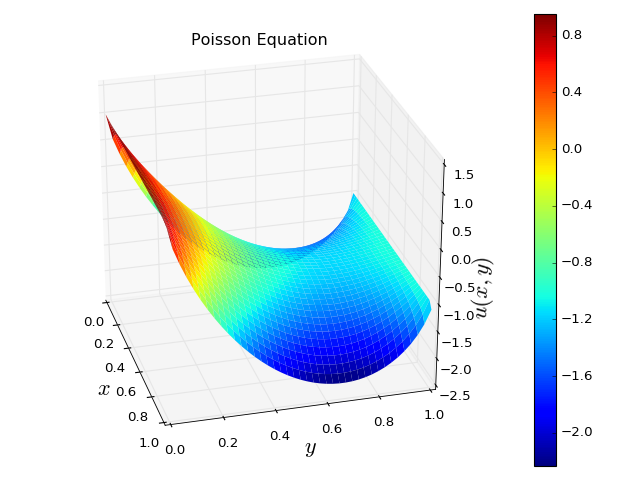

In [482]:
xl, xr, yb, yt = 0., 1., 0., 1.
M, N = 40,40
xx, yy, W = poisson_equation(xl, xr, yb, yt, M, N)
[X, Y] = np.meshgrid(xx, yy)
# Plot results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$y$", fontsize=20)
ax.set_zlabel("$u(x,y)$", fontsize=20)
ax.set_title("Poisson Equation")
surface = ax.plot_surface(X, Y, W, cmap=cm.jet, linewidth=0, antialiased=True, rstride=1, cstride=1)
fig.colorbar(surface)
plt.tight_layout()
plt.draw()

## Disclaimer

El presente notebook ha sido creado para el curso ILI286 - Computación Científica 2, del Departamento de Informática, Universidad Técnica Federico Santa María. El material ha sido creado por Alejandro Sazo (asazo@alumnos.inf.utfsm.cl). En caso de encontrar un error, por favor no dude en contactar al email especificado. Puede encontrar la última versión del código en https://github.com/asazo/CC2